# Tutorial 1: Basic data handeling with python

In [ ]:
'''
Content: 
    Getting started
        Importing the requiered libraries with a short reminder/explanation why we need them
    The data
        loading the data from the source and displaying it in a nice, clean way (pandas)
    Visualisation
        Basic visualisation of the data in order to get a better feeling for it
    Feeding it into the algorithem
        
    What do we see?
        
'''    

#### Getting started

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
#import urllib.request
from sklearn import datasets

In [99]:
np.random.seed(2304)
%matplotlib inline


In [37]:
#url = 'https://assets.datacamp.com/production/course_1939/datasets/diabetes.csv'
#urllib.request.urlretrieve(url, 'diabetes.csv')
cancer = datasets.load_breast_cancer()
#print(cancer['DESCR'])
print(f"Features: {cancer['feature_names']}")



Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [36]:
#diabetes = pd.read_csv('diabetes.csv')
#diabetes.head()

In [39]:
print(f"Labels: {cancer['target_names']}")


Labels: ['malignant' 'benign']


In [40]:
cancer['data'].shape


(569, 30)

In [121]:
cancer_dataframe = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
cancer_dataframe.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### What is this data? 

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

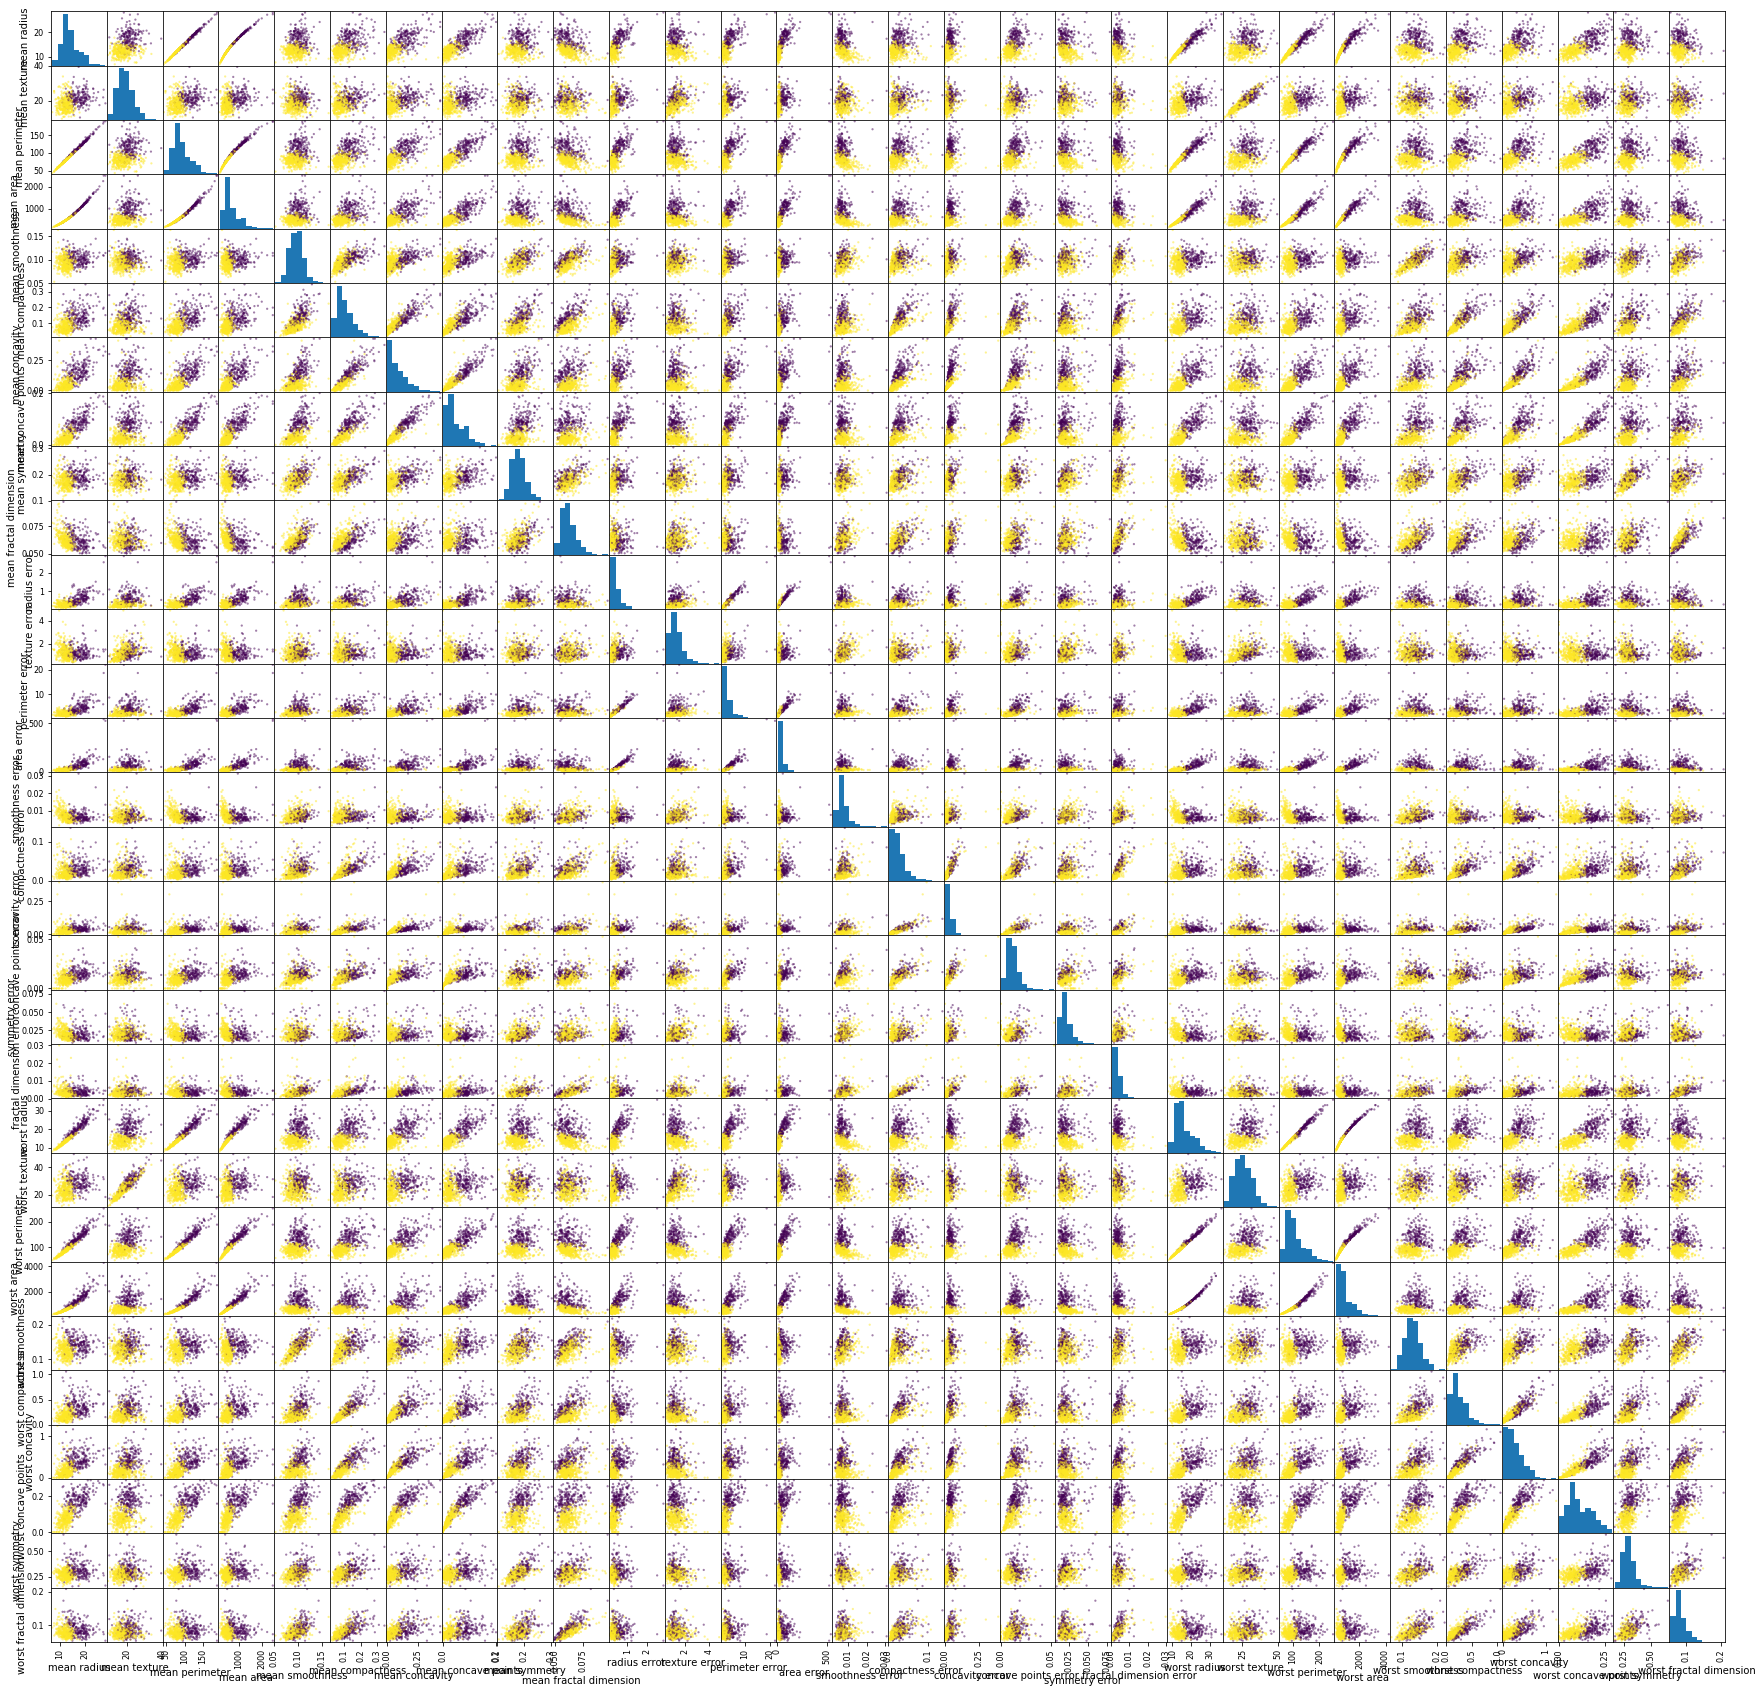

'Benign is yellow, Malignant is Violet'

In [133]:
pd.plotting.scatter_matrix(cancer_dataframe, c=cancer['target'], figsize=(30,30), marker='o', s=5)
plt.show()
'Benign is yellow, Malignant is Violet'
#pd.DataFrame.hist(cancer_dataframe, figsize=(20, 20))

'some combinations of features are already well suited for the characterisation of cancer by themselfes. \nThis is showcased by scatterplots with relatively clear separation between the two labels'

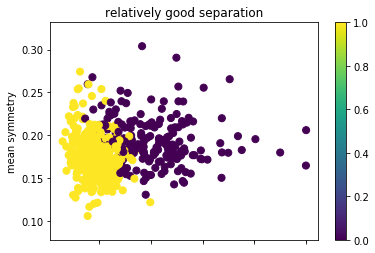

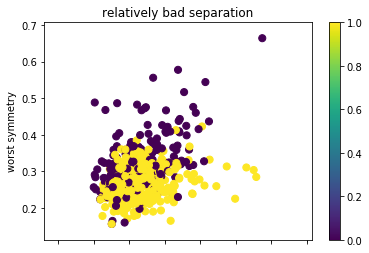

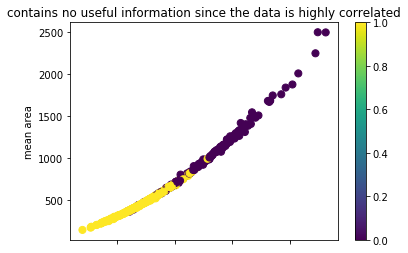

In [136]:
cancer_dataframe.plot.scatter(x='mean area', y='mean symmetry', c=cancer['target'], colormap='viridis', s=50, title='relatively good separation');
cancer_dataframe.plot.scatter(x='mean fractal dimension', y='worst symmetry', c=cancer['target'], colormap='viridis', s=50, title='relatively bad separation');
cancer_dataframe.plot.scatter(x='mean radius', y='mean area', c=cancer['target'], colormap='viridis', s=50, title='contains no useful information since the data is highly correlated');

'''some combinations of features are already well suited for the characterisation of cancer by themselfes. 
This is showcased by scatterplots with relatively clear separation between the two labels'''

'''We can select the best features and feed them into mashine learning model'''

###### We can see

In [178]:
X = cancer['data'][:, [0, 1, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 25, 26, 27, 28, 29]]
y = cancer['target']

X.shape
#print(y[:300])




(569, 24)

In [172]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(f'Training data: {X_train.shape}\nTest data: {X_test.shape}')


Training data: (426, 24)
Test data: (143, 24)


In [173]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=2304) # random_state for reproducibility
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


In [174]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.972027972027972

In [175]:
importances = rf.feature_importances_
importances


array([0.02522019, 0.02282533, 0.01797963, 0.07297894, 0.1622519 ,
       0.00088739, 0.00860427, 0.0039374 , 0.0097446 , 0.04087419,
       0.06035617, 0.00740149, 0.00216459, 0.00779002, 0.00362914,
       0.01057074, 0.01161039, 0.24392798, 0.07843396, 0.01695998,
       0.0206566 , 0.13347271, 0.0297203 , 0.00800209])

In [214]:
indices = np.argsort(importances)[::-1]
#XX = cancer_dataframe[cancer_dataframe.columns=['mean area'])]
#XX.head(5)
#indices
#for f in range(X.shape[1]): 
 #   print(f'{X.columns[indices[f]]}: {np.round(importances[indices[f]],2)}')
    
list(cancer_dataframe.columns.values)


TypeError: 'tuple' object is not callable